In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [ ]:
url = "https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv"
data = pd.read_csv(url, names=col_names, header=0)

In [ ]:
print("Dataset shape:", data.shape)
print(data.head())

Dataset shape: (768, 9)
   pregnant  glucose  bp  skin  insulin   bmi  pedigree  age  label
0         6      148  72    35        0  33.6     0.627   50      1
1         1       85  66    29        0  26.6     0.351   31      0
2         8      183  64     0        0  23.3     0.672   32      1
3         1       89  66    23       94  28.1     0.167   21      0
4         0      137  40    35      168  43.1     2.288   33      1


In [ ]:
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64


In [ ]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
x = data[feature_cols]
y = data['label']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)
print("\nTrain/Test Split Shapes:")
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)


Train/Test Split Shapes:
(614, 7) (614,) (154, 7) (154,)


In [ ]:
model = DecisionTreeClassifier(criterion='entropy', random_state=5)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=5)

In [ ]:
y_pred = model.predict(x_test)
print('\nPredicted values:', y_pred)


Predicted values: [1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 1
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 0 1
 1 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0
 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1
 0 0 1 1 0 1]


In [ ]:
conf_mat = metrics.confusion_matrix(y_test, y_pred)
print('\nConfusion Matrix:\n', conf_mat)


Confusion Matrix:
 [[77 23]
 [19 35]]


In [ ]:
Accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score:', Accuracy_score)
print('Accuracy in Percentage:', int(Accuracy_score * 100), '%')

Accuracy Score: 0.7272727272727273
Accuracy in Percentage: 72 %


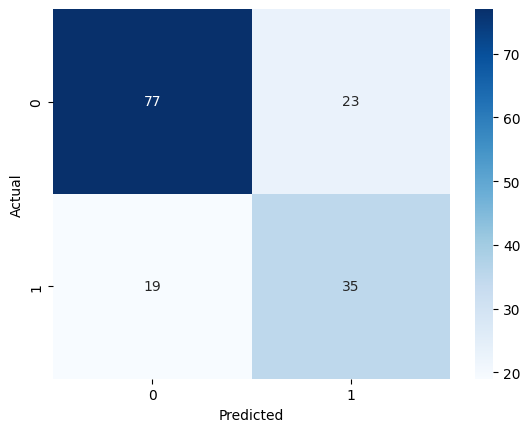

In [ ]:
conf_mat_df = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(conf_mat_df, annot=True, cmap="Blues", fmt='g')
plt.show()